In [9]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

import data_preprocessing
import model
import train

Load datasets

In [2]:
x_train, y_train = loadlocal_mnist(
    images_path='Data/train-images.idx3-ubyte',
    labels_path='Data/train-labels.idx1-ubyte')

x_test, y_test = loadlocal_mnist(
    images_path='Data/t10k-images.idx3-ubyte',
    labels_path='Data/t10k-labels.idx1-ubyte')

print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_train))
print('Class distribution: %s' % np.bincount(y_train))

x_train.shape: (60000, 784)
y_train.shape: (60000,)
x_test.shape: (10000, 784)
y_test.shape: (10000,)
Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


Data preprocessing

In [3]:
x_train, x_test = data_preprocessing.standardization(x_train, x_test)
x_train, x_test = data_preprocessing.pca(x_train, x_test, variance_retained=0.7)
x_train, x_test = data_preprocessing.normalization(x_train, x_test)

Number of PCA components: 98
x_train.shape after PCA: (60000, 98)
x_test.shape after PCA: (10000, 98)


Initialize model with default setting

In [4]:
mlp, weights, bias = model.model(x_train, y_train, (10, ))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
shape of weights in layer 1: (98, 10)
shape of weights in layer 2: (10, 10)
shape of bias in layer 1: (10,)
shape of bias in layer 2: (10,)


In [5]:
epochs = 10
batch_size = 10000

results = train.train(epochs, batch_size, mlp, x_train, y_train)

Epoch  1
Generation: 1, Step [10000/48000], Acc: 0.1953
Generation: 2, Step [10000/48000], Acc: 0.2035
Generation: 3, Step [10000/48000], Acc: 0.2035
Generation: 4, Step [10000/48000], Acc: 0.2035
Generation: 5, Step [10000/48000], Acc: 0.2035
Generation: 6, Step [10000/48000], Acc: 0.2312
Generation: 7, Step [10000/48000], Acc: 0.2312
Generation: 8, Step [10000/48000], Acc: 0.2312
Generation: 9, Step [10000/48000], Acc: 0.2312
Generation: 10, Step [20000/48000], Acc: 0.2204
Generation: 11, Step [20000/48000], Acc: 0.2237
Generation: 12, Step [20000/48000], Acc: 0.2237
Generation: 13, Step [20000/48000], Acc: 0.2237
Generation: 14, Step [20000/48000], Acc: 0.2286
Generation: 15, Step [20000/48000], Acc: 0.2286
Generation: 16, Step [20000/48000], Acc: 0.2286
Generation: 17, Step [20000/48000], Acc: 0.2286
Generation: 18, Step [20000/48000], Acc: 0.2286
Generation: 19, Step [20000/48000], Acc: 0.2381
Generation: 20, Step [30000/48000], Acc: 0.2378
Generation: 21, Step [30000/48000], Acc:

Generation: 23, Step [30000/48000], Acc: 0.4192
Generation: 24, Step [30000/48000], Acc: 0.4192
Generation: 25, Step [30000/48000], Acc: 0.4192
Generation: 26, Step [30000/48000], Acc: 0.4192
Generation: 27, Step [30000/48000], Acc: 0.4192
Generation: 28, Step [30000/48000], Acc: 0.4192
Generation: 29, Step [30000/48000], Acc: 0.4192
Generation: 30, Step [40000/48000], Acc: 0.4226
Generation: 31, Step [40000/48000], Acc: 0.4226
Generation: 32, Step [40000/48000], Acc: 0.4226
Generation: 33, Step [40000/48000], Acc: 0.4226
Generation: 34, Step [40000/48000], Acc: 0.4226
Generation: 35, Step [40000/48000], Acc: 0.4226
Generation: 36, Step [40000/48000], Acc: 0.4226
Generation: 37, Step [40000/48000], Acc: 0.4226
Generation: 38, Step [40000/48000], Acc: 0.4226
Generation: 39, Step [40000/48000], Acc: 0.4226
Generation: 40, Step [48000/48000], Acc: 0.4294
Generation: 41, Step [48000/48000], Acc: 0.4294
Generation: 42, Step [48000/48000], Acc: 0.4294
Generation: 43, Step [48000/48000], Acc:

Generation: 45, Step [48000/48000], Acc: 0.4711
Generation: 46, Step [48000/48000], Acc: 0.4711
Generation: 47, Step [48000/48000], Acc: 0.4711
Generation: 48, Step [48000/48000], Acc: 0.4711
Generation: 49, Step [48000/48000], Acc: 0.4711
Avg validation acc: 0.4714
Epoch  8
Generation: 1, Step [10000/48000], Acc: 0.4692
Generation: 2, Step [10000/48000], Acc: 0.4692
Generation: 3, Step [10000/48000], Acc: 0.4692
Generation: 4, Step [10000/48000], Acc: 0.4692
Generation: 5, Step [10000/48000], Acc: 0.4692
Generation: 6, Step [10000/48000], Acc: 0.4692
Generation: 7, Step [10000/48000], Acc: 0.4692
Generation: 8, Step [10000/48000], Acc: 0.4692
Generation: 9, Step [10000/48000], Acc: 0.4692
Generation: 10, Step [20000/48000], Acc: 0.4690
Generation: 11, Step [20000/48000], Acc: 0.4690
Generation: 12, Step [20000/48000], Acc: 0.4690
Generation: 13, Step [20000/48000], Acc: 0.4690
Generation: 14, Step [20000/48000], Acc: 0.4690
Generation: 15, Step [20000/48000], Acc: 0.4690
Generation: 1

In [41]:
test_acc = mlp.score(x_test, y_test)
print("test acc: ", test_acc)

test acc:  0.5232


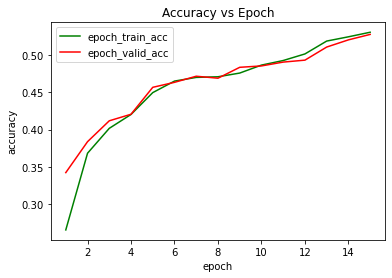

In [39]:
epochs = 15
x1 = results["epoch_train_accs"]
x2 = results["epoch_valid_accs"]
y = range(1, epochs + 1)
    
plt.plot(y, x1, 'g', label='epoch_train_acc')
plt.plot(y, x2, 'r', label='epoch_valid_acc')

plt.title("Accuracy vs Epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

Test with different number of hidden layers

In [4]:
mlp, weights, bias = model.model(x_train, y_train, (10, 10,))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
shape of weights in layer 1: (98, 10)
shape of weights in layer 2: (10, 10)
shape of weights in layer 3: (10, 10)
shape of bias in layer 1: (10,)
shape of bias in layer 2: (10,)
shape of bias in layer 3: (10,)


In [5]:
epochs = 2
batch_size = 10000

results_2_layers = train.train(epochs, batch_size, mlp, x_train, y_train)

Epoch  1
Generation: 1, Step [10000/48000], Acc: 0.1729
Generation: 2, Step [10000/48000], Acc: 0.1811
Generation: 3, Step [10000/48000], Acc: 0.2078
Generation: 4, Step [10000/48000], Acc: 0.2078
Generation: 5, Step [10000/48000], Acc: 0.2078
Generation: 6, Step [10000/48000], Acc: 0.2078
Generation: 7, Step [10000/48000], Acc: 0.2078
Generation: 8, Step [10000/48000], Acc: 0.2078
Generation: 9, Step [10000/48000], Acc: 0.2214
Generation: 10, Step [20000/48000], Acc: 0.2152
Generation: 11, Step [20000/48000], Acc: 0.2152
Generation: 12, Step [20000/48000], Acc: 0.2152
Generation: 13, Step [20000/48000], Acc: 0.2152
Generation: 14, Step [20000/48000], Acc: 0.2152
Generation: 15, Step [20000/48000], Acc: 0.2402
Generation: 16, Step [20000/48000], Acc: 0.2429
Generation: 17, Step [20000/48000], Acc: 0.2485
Generation: 18, Step [20000/48000], Acc: 0.2485
Generation: 19, Step [20000/48000], Acc: 0.2498
Generation: 20, Step [30000/48000], Acc: 0.2522
Generation: 21, Step [30000/48000], Acc:

KeyboardInterrupt: 

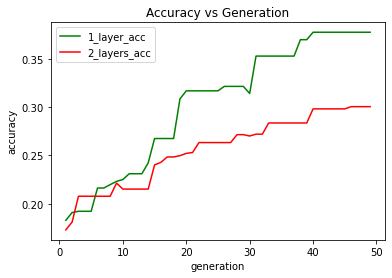

In [83]:
x1 = results[train_accs][0:97]
x2 = results_2_layers
y = range(1, len(acc_1_layer) + 1)

plt.plot(y, x1, 'g', label='1_layer_acc')
plt.plot(y, x2, 'r', label='2_layers_acc')

plt.title("Accuracy vs Generation")
plt.xlabel("generation")
plt.ylabel("accuracy")

plt.legend()
plt.show()

Test with different number of hidden units

In [50]:
mlp, weights, bias = model.model(x_train, y_train, (5,))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
shape of weights in layer 1: (98, 5)
shape of weights in layer 2: (5, 10)
shape of bias in layer 1: (5,)
shape of bias in layer 2: (10,)


In [51]:
epochs = 1
batch_size = 10000

results_5_nodes = train.train(epochs, batch_size, mlp, x_train, y_train)

Epoch  1
Generation: 1, Step [10000/48000], Acc: 0.1952
Generation: 2, Step [10000/48000], Acc: 0.1952
Generation: 3, Step [10000/48000], Acc: 0.2072
Generation: 4, Step [10000/48000], Acc: 0.2245
Generation: 5, Step [10000/48000], Acc: 0.2245
Generation: 6, Step [10000/48000], Acc: 0.2245
Generation: 7, Step [10000/48000], Acc: 0.2245
Generation: 8, Step [10000/48000], Acc: 0.2245
Generation: 9, Step [10000/48000], Acc: 0.2259
Generation: 10, Step [20000/48000], Acc: 0.2320
Generation: 11, Step [20000/48000], Acc: 0.2320
Generation: 12, Step [20000/48000], Acc: 0.2424
Generation: 13, Step [20000/48000], Acc: 0.2424
Generation: 14, Step [20000/48000], Acc: 0.2424
Generation: 15, Step [20000/48000], Acc: 0.2424
Generation: 16, Step [20000/48000], Acc: 0.2424
Generation: 17, Step [20000/48000], Acc: 0.2671
Generation: 18, Step [20000/48000], Acc: 0.2671
Generation: 19, Step [20000/48000], Acc: 0.2671
Generation: 20, Step [30000/48000], Acc: 0.2589
Generation: 21, Step [30000/48000], Acc:

In [52]:
print(results_5_nodes["computation_time"])

1114.319510936737


In [45]:
mlp, weights, bias = model.model(x_train, y_train, (100,))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
shape of weights in layer 1: (98, 100)
shape of weights in layer 2: (100, 10)
shape of bias in layer 1: (100,)
shape of bias in layer 2: (10,)


In [47]:
epochs = 1
batch_size = 10000

results_100_nodes = train.train(epochs, batch_size, mlp, x_train, y_train)

Epoch  1
Generation: 1, Step [10000/48000], Acc: 0.1957
Generation: 2, Step [10000/48000], Acc: 0.1957
Generation: 3, Step [10000/48000], Acc: 0.1957
Generation: 4, Step [10000/48000], Acc: 0.1957
Generation: 5, Step [10000/48000], Acc: 0.2378
Generation: 6, Step [10000/48000], Acc: 0.2378
Generation: 7, Step [10000/48000], Acc: 0.2378
Generation: 8, Step [10000/48000], Acc: 0.2378
Generation: 9, Step [10000/48000], Acc: 0.2378
Generation: 10, Step [20000/48000], Acc: 0.2415
Generation: 11, Step [20000/48000], Acc: 0.2415
Generation: 12, Step [20000/48000], Acc: 0.2415
Generation: 13, Step [20000/48000], Acc: 0.2415
Generation: 14, Step [20000/48000], Acc: 0.2415
Generation: 15, Step [20000/48000], Acc: 0.2415
Generation: 16, Step [20000/48000], Acc: 0.2482
Generation: 17, Step [20000/48000], Acc: 0.2544
Generation: 18, Step [20000/48000], Acc: 0.2544
Generation: 19, Step [20000/48000], Acc: 0.2544
Generation: 20, Step [30000/48000], Acc: 0.2609
Generation: 21, Step [30000/48000], Acc:

In [54]:
print(results_100_nodes["computation_time"])

4498.460297346115


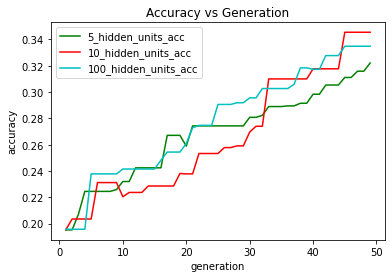

In [77]:
x1 = results_5_nodes["train_accs"]
x2 = results["train_accs"][0:49]
x3 = results_100_nodes["train_accs"]
y = range(1, len(results_5_nodes["train_accs"]) + 1)

plt.plot(y, x1, 'g', label='5_hidden_units_acc')
plt.plot(y, x2, 'r', label='10_hidden_units_acc')
plt.plot(y, x3, 'c', label='100_hidden_units_acc')

plt.title("Accuracy vs Generation")
plt.xlabel("generation")
plt.ylabel("accuracy")

plt.legend()
plt.show()